<a href="https://colab.research.google.com/github/Rohith60715/python/blob/main/HWDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
HANDWRITTEN DIGIT PREDICTION

In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

import data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

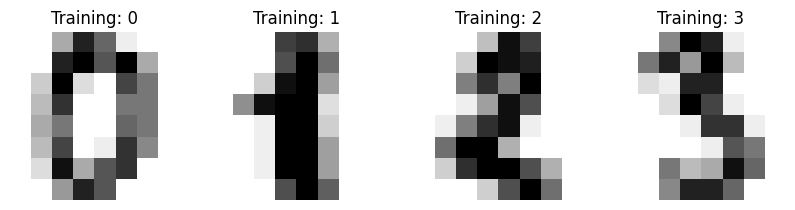

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

preprocessing

In [10]:
df.images.shape


(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data.shape

(1797, 64)

scaling image data

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data= data/16

In [18]:
data.max()

1.0

train test split

In [19]:
from sklearn. model_selection import train_test_split

In [23]:

X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf = rf.fit(X_train, y_train)

In [28]:
y_pred = rf.predict(X_test)

In [29]:
y_pred

array([1, 6, 0, 8, 2, 6, 2, 4, 7, 6, 0, 9, 9, 7, 9, 1, 5, 7, 9, 4, 6, 8,
       1, 4, 0, 7, 8, 8, 8, 1, 6, 7, 2, 4, 3, 3, 5, 2, 4, 7, 1, 4, 7, 3,
       9, 9, 6, 2, 9, 5, 5, 1, 0, 6, 0, 4, 5, 9, 2, 7, 5, 4, 5, 6, 3, 2,
       5, 7, 1, 5, 4, 1, 7, 7, 5, 7, 4, 6, 6, 0, 5, 7, 3, 8, 7, 8, 0, 8,
       3, 2, 7, 5, 7, 7, 6, 2, 1, 6, 3, 1, 6, 0, 3, 1, 8, 2, 8, 3, 6, 1,
       8, 1, 8, 3, 0, 3, 5, 0, 1, 2, 5, 0, 6, 2, 5, 1, 5, 3, 6, 8, 0, 4,
       9, 6, 6, 8, 6, 2, 0, 8, 0, 0, 5, 2, 2, 2, 6, 3, 4, 0, 0, 5, 2, 0,
       1, 0, 5, 1, 0, 6, 4, 3, 9, 3, 2, 4, 4, 7, 9, 4, 4, 1, 5, 2, 0, 7,
       0, 7, 4, 3, 9, 4, 3, 4, 4, 0, 9, 7, 5, 7, 0, 3, 0, 0, 4, 4, 5, 8,
       3, 6, 5, 6, 3, 7, 7, 3, 2, 3, 4, 5, 6, 5, 6, 6, 9, 4, 9, 4, 6, 5,
       5, 4, 5, 8, 9, 5, 5, 9, 3, 4, 7, 4, 6, 0, 2, 7, 1, 4, 1, 9, 5, 7,
       5, 7, 9, 4, 4, 1, 2, 6, 9, 1, 9, 2, 0, 7, 8, 9, 3, 0, 7, 0, 7, 5,
       2, 6, 2, 5, 1, 9, 6, 6, 4, 6, 6, 5, 0, 0, 3, 0, 2, 5, 9, 7, 1, 8,
       7, 9, 1, 7, 8, 1, 1, 0, 5, 4, 1, 0, 9, 3, 0,

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test, y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  2,  2,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  1,  4],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  3,  1,  0,  1,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0,  0, 54]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.92      1.00      0.96        55
           2       0.98      0.98      0.98        48
           3       0.96      0.91      0.93        54
           4       0.98      1.00      0.99        58
           5       0.95      0.92      0.93        59
           6       1.00      0.98      0.99        57
           7       0.96      1.00      0.98        53
           8       0.93      0.88      0.90        43
           9       0.93      0.93      0.93        58

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

